In [1]:
import json
from matplotlib import pyplot as plt

In [2]:
with open("json_data.txt", "r") as file:
    filecontent = file.read()
    lines = filecontent.splitlines()

In [3]:
lx1 = [ int(line.split(": ")[1].split(", ")[0]) for line in lines ]

In [4]:
lx1sets = set(lx1)
print(f"{len(lx1)=}, {len(lx1sets)=} {max(lx1sets)=} {min(lx1sets)=} {max(lx1sets) - min(lx1sets)=} {lx1sets=}\n")

len(lx1)=1416, len(lx1sets)=61 max(lx1sets)=1724027679 min(lx1sets)=1724027619 max(lx1sets) - min(lx1sets)=60 lx1sets={1724027648, 1724027649, 1724027650, 1724027651, 1724027652, 1724027653, 1724027654, 1724027655, 1724027656, 1724027657, 1724027658, 1724027659, 1724027660, 1724027661, 1724027662, 1724027663, 1724027664, 1724027665, 1724027666, 1724027667, 1724027668, 1724027669, 1724027670, 1724027671, 1724027672, 1724027673, 1724027674, 1724027675, 1724027676, 1724027677, 1724027678, 1724027679, 1724027619, 1724027620, 1724027621, 1724027622, 1724027623, 1724027624, 1724027625, 1724027626, 1724027627, 1724027628, 1724027629, 1724027630, 1724027631, 1724027632, 1724027633, 1724027634, 1724027635, 1724027636, 1724027637, 1724027638, 1724027639, 1724027640, 1724027641, 1724027642, 1724027643, 1724027644, 1724027645, 1724027646, 1724027647}



In [5]:
for lx1set in lx1sets:
    print(f" {lx1set=} {lx1.count(lx1set)} ")

 lx1set=1724027648 24 
 lx1set=1724027649 23 
 lx1set=1724027650 24 
 lx1set=1724027651 24 
 lx1set=1724027652 24 
 lx1set=1724027653 24 
 lx1set=1724027654 23 
 lx1set=1724027655 24 
 lx1set=1724027656 23 
 lx1set=1724027657 24 
 lx1set=1724027658 24 
 lx1set=1724027659 24 
 lx1set=1724027660 23 
 lx1set=1724027661 24 
 lx1set=1724027662 23 
 lx1set=1724027663 24 
 lx1set=1724027664 24 
 lx1set=1724027665 24 
 lx1set=1724027666 24 
 lx1set=1724027667 23 
 lx1set=1724027668 24 
 lx1set=1724027669 23 
 lx1set=1724027670 24 
 lx1set=1724027671 24 
 lx1set=1724027672 24 
 lx1set=1724027673 24 
 lx1set=1724027674 23 
 lx1set=1724027675 24 
 lx1set=1724027676 23 
 lx1set=1724027677 24 
 lx1set=1724027678 24 
 lx1set=1724027679 1 
 lx1set=1724027619 18 
 lx1set=1724027620 23 
 lx1set=1724027621 24 
 lx1set=1724027622 24 
 lx1set=1724027623 23 
 lx1set=1724027624 24 
 lx1set=1724027625 24 
 lx1set=1724027626 24 
 lx1set=1724027627 23 
 lx1set=1724027628 24 
 lx1set=1724027629 23 
 lx1set=1724

In [6]:
jx = json.loads(filecontent)

In [7]:
def smooth_this(new: int, old: int, percentage: int):
    percentage = percentage  / 100
    val = new * (percentage) + old * ( 1 - percentage)
    return val

In [8]:
def smooth_sensor(percentage=10):
    axl, ayl, azl = [], [], []
    for idx in range(len(jx)):
        curr = jx[idx]['accel']
        x, y, z = curr['x'], curr['y'], curr['z']
        if len(axl) > 0:
            x = smooth_this(x, axl[idx-1], percentage)
            y = smooth_this(y, ayl[idx-1], percentage)
            z = smooth_this(z, azl[idx-1], percentage)
        axl.append(x)
        ayl.append(y)
        azl.append(z)
    plt.title(f"percentage: {percentage}")
    plt.plot(axl)
    plt.plot(ayl)
    plt.plot(azl)
    plt.show()
    return (axl, ayl, azl)

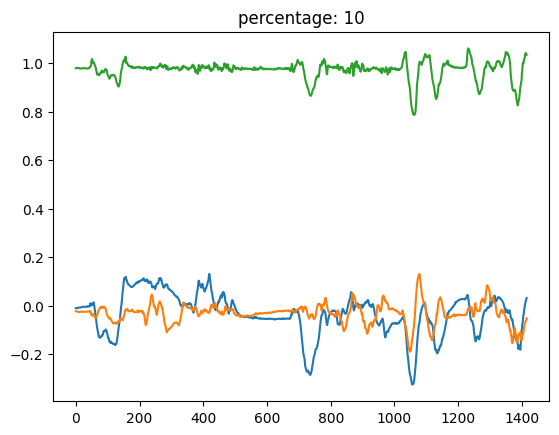

In [16]:
x = smooth_sensor(10)

In [247]:
import numpy as np

mapped = list(zip(data[0], data[1], data[2]))

points = np.array( mapped ).T

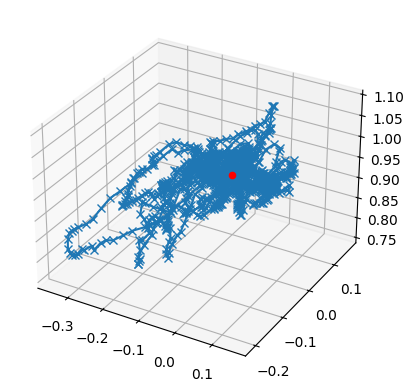

In [248]:
fig = plt.figure()
ax = fig.add_subplot(111, projection = '3d')
ax.plot(points[0], points[1], points[2], marker = 'x')
ax.scatter(*points.T[0], color = 'red')
plt.show()